## ID3 Estimator
Berikut ini merupakan implementasi algoritma ID3 Estimator menggunakan library yang berasal dari github.

---
## Setup Library dan Dataset

In [10]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.1294,0.3885,0.4756,0.24320,0.2741,0.08574
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.1679,0.1663,0.09123,0.2394,0.06469
196,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,0.06877,...,16.39,34.01,111.60,806.9,0.1737,0.3122,0.3809,0.16730,0.3080,0.09333
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
109,11.34,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.01899,0.1487,0.06529,...,13.01,29.15,83.99,518.1,0.1699,0.2196,0.3120,0.08278,0.2829,0.08832


---
## Create Model

In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

# Define model
model = Id3Estimator()

---
## Fitting and predict

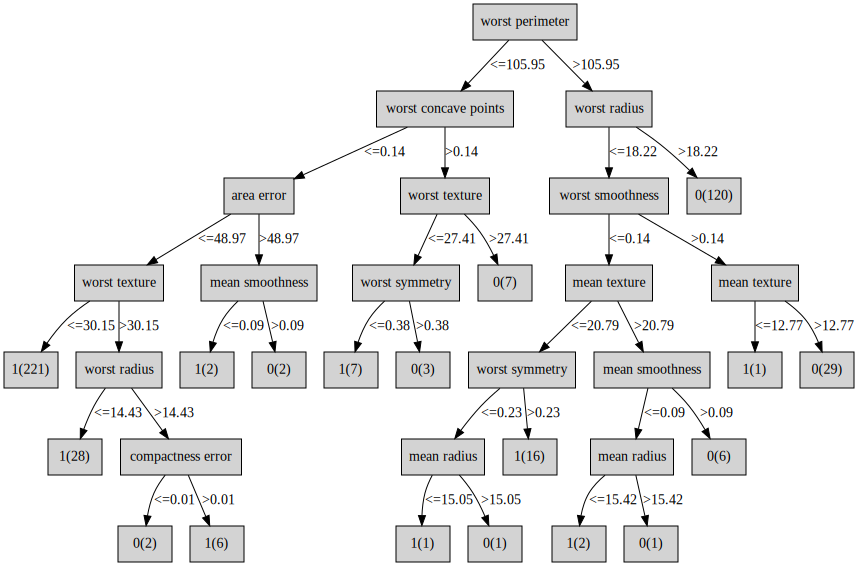

In [12]:
import graphviz
from id3 import export_graphviz

# Preprocessing of training data, fit model 
model.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_tree = export_graphviz(model.tree_, 'graph.dot', 
                  feature_names=[d for d in data.feature_names], 
                  )
with open("graph.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)

# Preprocessing of validation data, get predictions
preds = model.predict(X_valid_full)

graph

---
## Accuracy and F1 Score

In [8]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_valid, preds)
f1 = f1_score(y_valid, preds)
score_data = {'accuracy': accuracy, 'f1': f1}
score = pd.DataFrame(data = score_data, index=['score'])
score

,accuracy,f1
score,0.929825,0.942029
